In [1]:
# TRIVIAL CHANGE
# YES MORE CHANGE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})
rc('text', usetex=True)

In [2]:
# Exercise 1.1
def eulerExp(x0=1., v0=0., t0=0., P=5, h=0.1):
    t = np.arange(t0, t0+P*2*np.pi+h, h)
    N = len(t)
    x = np.zeros(N)
    v = np.zeros(N)
    x[0], v[0] = x0, v0
    for i in range(N-1):
        x[i+1] = x[i] + h*v[i]
        v[i+1] = v[i] - h*x[i]
    return (t, x, v)

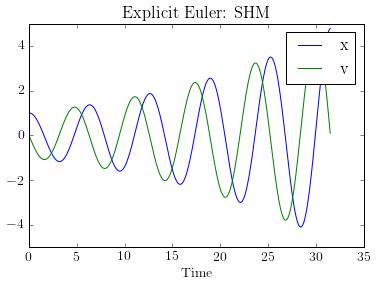

In [3]:
# Exercise 1.1
t, x, v = eulerExp()
plt.plot(t, x, label='x')
plt.plot(t, v, label='v')
plt.legend()
plt.title('Explicit Euler: SHM')
plt.xlabel('Time')
plt.savefig('img/p1_1.pdf')

In [4]:
# Analytic SHM
def SHM(x0=1., v0=0., t0=0., P=5, h=0.1):
    t = np.arange(t0, t0+P*2*np.pi+h, h)
    x = x0*np.cos(t-t0) + v0*np.sin(t-t0)
    v = v0*np.cos(t-t0) - x0*np.sin(t-t0)
    return (t, x, v)

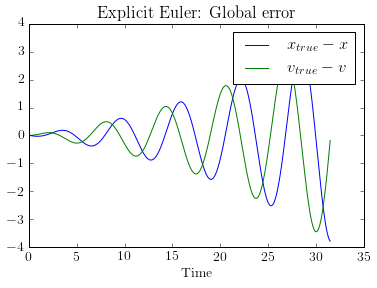

In [5]:
# Exercise 1.2
t, x, v = eulerExp()
T, X, V = SHM()
plt.plot(t, X-x, label='$x_{\\text{true}}-x$')
plt.plot(t, V-v, label='$v_{\\text{true}}-v$')
plt.legend()
plt.title('Explicit Euler: Global error')
plt.xlabel('Time')
plt.savefig('img/p1_2.pdf')

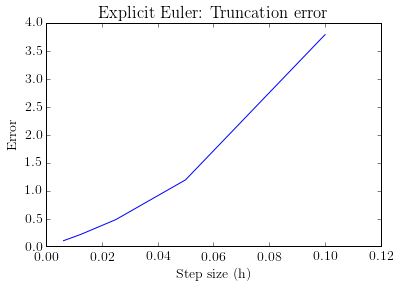

In [6]:
# Exercise 1.3
h0 = 0.1
h = h0/np.power(2, np.arange(5))
err = np.zeros(np.size(h))
for i in range(len(h)):
    err[i] = np.max(np.abs(SHM(h=h[i])[1]-eulerExp(h=h[i])[1]))
plt.plot(h, err)
plt.title('Explicit Euler: Truncation error')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.savefig('img/p1_3.pdf')

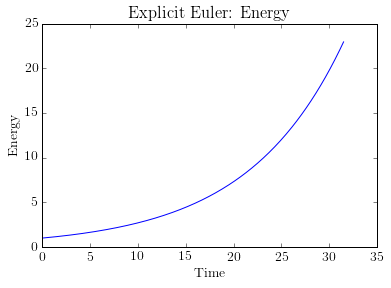

In [7]:
# Exercise 1.4
t, x, v = eulerExp()
E = np.power(x, 2) + np.power(v, 2)
plt.plot(t, E)
plt.title('Explicit Euler: Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.savefig('img/p1_4.pdf')

In [8]:
# Exercise 1.5
def eulerImp(x0=1., v0=0., t0=0., P=5, h=0.1):
    t = np.arange(t0, t0+P*2*np.pi+h, h)
    N = len(t)
    x = np.zeros(N)
    v = np.zeros(N)
    x[0], v[0] = x0, v0
    for i in range(N-1):
        x[i+1] = (x[i] + h*v[i])/(1. + h**2)
        v[i+1] = (v[i] - h*x[i])/(1. + h**2)
    return (t, x, v)

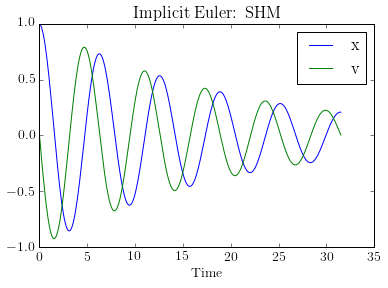

In [9]:
# Exercise 1.5
# Solution
t, x, v = eulerImp()
plt.plot(t, x, label='x')
plt.plot(t, v, label='v')
plt.legend()
plt.title('Implicit Euler: SHM')
plt.xlabel('Time')
plt.savefig('img/p1_5_1.pdf')

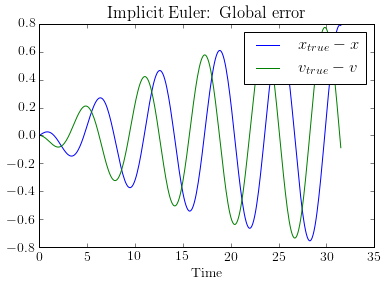

In [10]:
# Exercise 1.5
# Global error
t, x, v = eulerImp()
T, X, V = SHM()
plt.plot(t, X-x, label='$x_{\\text{true}}-x$')
plt.plot(t, V-v, label='$v_{\\text{true}}-v$')
plt.legend()
plt.title('Implicit Euler: Global error')
plt.xlabel('Time')
plt.savefig('img/p1_5_2.pdf')

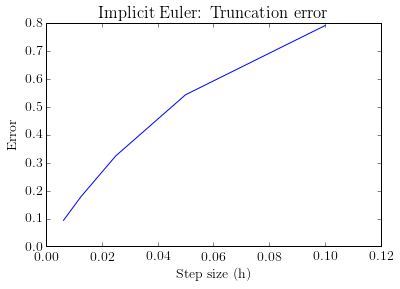

In [11]:
# Exercise 1.5
# Truncation error
h0 = 0.1
h = h0/np.power(2, np.arange(5))
err = np.zeros(np.size(h))
for i in range(len(h)):
    err[i] = np.max(np.abs(SHM(h=h[i])[1]-eulerImp(h=h[i])[1]))
plt.plot(h, err)
plt.title('Implicit Euler: Truncation error')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.savefig('img/p1_5_3.pdf')

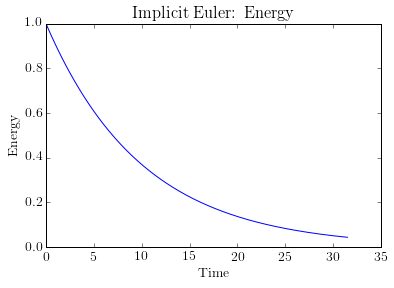

In [12]:
# Exercise 1.5
# Energy
t, x, v = eulerImp()
E = np.power(x, 2) + np.power(v, 2)
plt.plot(t, E)
plt.title('Implicit Euler: Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.savefig('img/p1_5_4.pdf')

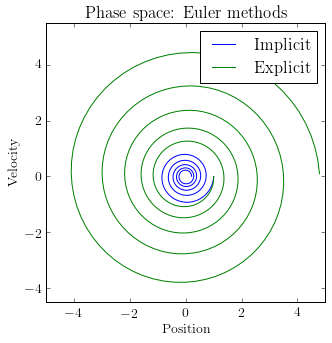

In [13]:
# Exercise 2.1
plt.figure(figsize=(5,5))
t, x, v = eulerImp()
T, X, V = eulerExp()
plt.plot(x, v, label='Implicit')
plt.plot(X, V, label='Explicit')
plt.legend()
plt.title('Phase space: Euler methods')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.axis('equal')
plt.savefig('img/p2_1.pdf')

In [14]:
# Exercise 2.2
def eulerSym(x0=1., v0=0., t0=0., P=5, h=0.1):
    t = np.arange(t0, t0+P*2*np.pi+h, h)
    N = len(t)
    x = np.zeros(N)
    v = np.zeros(N)
    x[0], v[0] = x0, v0
    for i in range(N-1):
        x[i+1] = x[i] + h*v[i]
        v[i+1] = v[i] - h*x[i+1]
    return (t, x, v)

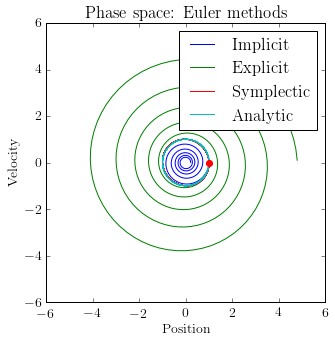

In [15]:
# Exercise 2.2
plt.figure(figsize=(5,5))
t, x, v = eulerImp()
T, X, V = eulerExp()
ts, xs, vs = eulerSym()
ta, xa, va = SHM()
plt.plot(x, v, label='Implicit')
plt.plot(X, V, label='Explicit')
plt.plot(xs, vs, label='Symplectic')
plt.plot(xa, va, label='Analytic')
plt.scatter(1, 0, marker='.', zorder=4, color='r', s=150)
plt.legend()
plt.title('Phase space: Euler methods')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.axis('equal')
plt.savefig('img/p2_2.pdf')

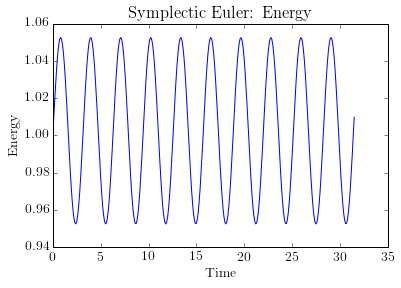

In [16]:
# Exercise 2.3
# Energy
t, x, v = eulerSym()
E = np.power(x, 2) + np.power(v, 2)
plt.plot(t, E)
plt.title('Symplectic Euler: Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.savefig('img/p2_3.pdf')